# DINAV 2223 LAB
> __INTERAÇÃO:__ 3 \
> __DATA:__  26/03/2023




# IDENTIFICAÇÃO DO GRUPO
> __NÚMERO:__ 1190998  __NOME:__ Ricardo Macedo \
> __NÚMERO:__ 1170513  __NOME:__ João Pinto



# Bibliotecas usadas
Para esta iteração foram usadas as bibliotecas do matplotlib, tksheet, scipy e numpy. Foram instaladas todas usando o pip e o IDE usado foi o Visual Studio Code. Abaixo estão os comandos para a instalação de cada biblioteca:

- pip install matplotlib

- pip install tksheet

- pip install scipy

- pip install numpy

- pip install pygame

- pip install PyOpenGL PyOpenGL_accelerate


# ANÁLISE CRÍTICA
> __Objetivos alcançados:__
Foi criada com sucesso uma interface para o input de dados e um interface tabular para o output de dados. \
Os objetivos iniciais de ser possivel demonstrar o manipulador na posição obtida e obter os dados relativos à posição final da sua extremidade foram concluidos com sucesso. Ainda foi possível animar o manipulador começando no ponto inicial, passando no intermédio e parando no ponto final. 

# COMO UTILIZAR:
0- Se for para usar o planeamento de trajetória apenas é preciso correr o código a partir da célula que diz Planeamento de trajetória - interpolação cúbica com ponto(s) intermédio(s), senão, se for para usar a cinemática direta ou inversa, pode ser usado o código já de seguida apresentado.

1- Inserir o tipo de dinâmica que se pretende usar, direta ou inversa.
2- Inserir os valores na caixa de texto com o prompt com os nomes dos valores associados: L1, L2, h, theta 1, theta 2 e theta 3 para cinemática direta e L1, L2, h, X, Y e Z para cinemática inversa. \
3- Clicar enter após cada input de valores. \
4- Observar a representação gráfica abaixo do código. \
5- Correr o código abaixo da representação para uma abrir a tabela com os valores obtidos e com os valores dados. \
6- Correr o código abaixo do da tabela para ver a vista lateral do braço robótico, onde a vermelho está o braço e a azul uma linha para visualizar o ângulo da junta.

Planeamento de trajetória - interpolação cúbica com ponto(s) intermédio(s)

1- Inserir o tempo pretendido para o movimento, em segundos. \
2- Inserir as coordenadas finais do manipulador, as intermédias e de seguidas iniciais. \
3- Correr o código seguinte para visualizar os gráficos das posições, velocidades e acelerações dos ponto final do manipulador, do ponto intermédio ou dos ângulos. Estes gráficos são escolhidos pelo utilizador, sendo que este introduz o gráfico que pretende observar, de modo a ser possível visualizar os gráficos pretendido, um modo de cada vez.
4- Correr o código seguinte para visualizar o manipulador a correr em tempo real, numa animação.



# REFERENCIAS UTILIZADAS (LINKS)
> 1 -https://matplotlib.org \
> 2 -https://numpy.org \
> 3 -https://scipy.org \
> 4 -https://docs.python.org/3/library/math.html \
> 5 -https://stackoverflow.com \
> 6 -https://pypi.org/project/tksheet/4.7.6/ \
> 7 -https://pyopengl.sourceforge.net/


In [ ]:
import sys
!{sys.executable} -m pip install pygame
import pygame

# definir cores
preto = (0, 0, 0)
branco = (255, 255, 255)
verde = (0, 255, 0)
vermelho = (255, 0, 0)
azul = (0, 0, 255)
roxo =(155,0,155)

pygame.init()

# altura e largura do ecrã em pixeis
size = [1450, 700]
screen = pygame.display.set_mode(size)

pygame.display.set_caption("Considerações iniciais")

# continuar até ser carregado no butão de fechar
done = False

# tick rate do update do ecrã basicamente
clock = pygame.time.Clock()

# definir o tamanho da font a ser aplicada
font = pygame.font.Font(None, 25)
font2 = pygame.font.Font(None, 30)
font1 = pygame.font.Font(None, 35)
# condições iniciais de funcionamento (dar display das instruções e a página ser a 1 )
instruction_page = 1

# -------- Instruction Page Loop -----------
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True
        # avançar a página
        if event.type == pygame.MOUSEBUTTONDOWN:
            instruction_page += 1

    # background do ecrã
    screen.fill(branco)

# desenhar a página 1
    if instruction_page == 1:
        text = font2.render("Considerações iniciais", True, preto)
        screen.blit(text, [10, 10])
        text = font.render("1- A largura atribuida ao L1 vai determinar os tamanhos possiveis de L2 \
sendo que L2 só pode ser 1/3 ou 3 vezes o valor de L1 e a altura 3/2 ou 2/3 do maior dos dois. ", True, preto)
        screen.blit(text, [10, 50])
        text = font.render(
            "Os valores serão limitados mesmo sem o consentimento do utilizador caso passe os limites de L2,", True, preto)
        screen.blit(text, [10, 80])
        text = font.render(
            "ao mesmo será atribuido o valor do limite inferior ou superior respetivamente.", True, preto)
        screen.blit(text, [10, 110])
        text = font.render(
            "O procedimento acima apresentado também será aplicado à altura, que terá o valor entre 0.5 e 1.5 vezes o valor da média de L1 e L2.", True, preto)
        screen.blit(text, [10, 140])
        text = font.render(
            "(Esta regra surge no contexto de evitar representações 'absurdas' onde L1 e L2 têm várias ordens de grandeza de diferença)", True, preto)
        screen.blit(text, [10, 170])
        ########################################## Regra 2##############################################
        text = font.render(
            "2- Os valores dos angulos atribuidos a cada eixo na abordagem direta são limitados por uma questão de realismo  ", True, preto)
        screen.blit(text, [10, 240])
        text = font.render(
            "Theta 2 limitado entre -80 a 260 graus e Theta 3 limitado entre -160 a 160 graus de modo a não se sobreporem um ao outro e à base.", True, preto)
        screen.blit(text, [10, 270])
        text = font.render(
            "Mais uma vez a autonomia do utilizador foi retirada mas os valores dados ainda serão considerados de modo a encontrar o caso que mais se aproxima ao pedido.", True, preto)
        screen.blit(text, [10, 300])
        text = font.render(
            "3- O x y e z na abordagem inversa, quando impossiveis, poderam ser limitados caso a vontade do utilizador baseado no tamanho de L1 e L2 ajustados com fatores calculados ", True, preto)
        screen.blit(text, [10, 370])
        text = font.render(
            "entre x y e z de modo a adaptar quaisquer valores de coordenada dados ao tamanho dos eixos reais refletidos na tabela final (terceiro código) ou então introduzir novos valores.", True, preto)
        screen.blit(text, [10, 400])
        text = font.render(
            "Esta regra surge no contexto de impedir com que coordenadas impossiveis, tendo em conta tamanhos de L1 e L2, afetem a representação do manipulador.", True, preto)
        screen.blit(text, [10, 430])
        text = font.render(
            "4- Relativamente à escolha entre upper e lower elbow, a escolha é total do utilizador mas caso se verifique que algo além  ", True, preto)
        screen.blit(text, [10, 500])
        text = font.render(
            "de 'up' ou 'low' é digitado será automaticamente escolhido o modo upper-elbow. ", True, preto)
        screen.blit(text, [10, 520])
        text = font1.render(
            "!!VALORES 'ABSURDOS' SERÃO AUTOMATICAMENTE CORRIGIDOS MAS FAVOR EVITAR QUANDO POSSÍVEL !!", True, preto)
        screen.blit(text, [10, 580])

        text = font.render("Página 1/3", True, preto)
        screen.blit(text, [10, 680])
# desenhar a página 2
    if instruction_page == 2:
        text = font1.render("Uso e funcionalidade das funções", True, preto)
        screen.blit(text, [10, 10])
        text = font.render(
            "1- Função das instruções: serve para dar um insight quanto à potencialidade do programa e as regras por detrás das variáveis.", True, preto)
        screen.blit(text, [10, 40])
        text = font.render(
            "2- Função principal na medida em que quando corrida é perguntado ao utilizador os parâmetros que o mesmo quer utilizar", True, preto)
        screen.blit(text, [10, 120])
        text = font.render(
            ", seguido da cinemática e caso inversa upper ou lower elbow, procedendo á validação e limitação dos valores dados e posterior representação gráfica.", True, preto)
        screen.blit(text, [10, 150])
        text = font.render(
            "Contando com 3 cilindros (preto: base, amarelo: L1, vermelho:L2) e 2 juntas (ponto base e ponto médio) e um cone de extremidade com coordenadas [xf,yf,zf]", True, preto)
        screen.blit(text, [10, 180])
        text = font.render(
            "3- Função de funcionalidade tabelar para expor de uma maneira mais legivel e conveniente os valores dados e os valores obtidos pela função principal.", True, preto)
        screen.blit(text, [10, 260])
        text = font.render(
            "4- Representação gráfica 2D que facilita a visualização dos ângulos das juntas e identifica os eixos, não incluída na representação 3D pelo detrimento na clareza visual.", True, preto)
        screen.blit(text, [10, 340])
        text = font.render("Página 2/3", True, preto)
        screen.blit(text, [10, 680])
    if instruction_page == 3:
        text = font.render("", True, preto)
        screen.blit(text, [10, 10])
        text = font.render("Work in progress...", True, preto)
        screen.blit(text, [10, 40])
        text = font.render("Página 3/3", True, preto)
        screen.blit(text, [10, 680])
    if instruction_page == 4:
        instruction_page = 1
    # Limitar para 60 frames
    clock.tick(60)
    pygame.display.flip()

pygame.quit()


In [ ]:

%matplotlib widget 
# instalar pacotes senão estiverem já presentes 

print("Eu adoro DINAV juroooooooo....")
try:
    import matplotlib.pyplot as plt
    import numpy as np
    import math
except:
    !{sys.executable} -m pip install matplotlib
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install math
try: 
    import tkinter as tk
    import tksheet
except:
    !{sys.executable} -m pip install tk
    !{sys.executable} -m pip install tksheet
from math import sin, cos, tan , pi 

try:
    from scipy.linalg import norm
except:
    !{sys.executable} -m pip install scipy
from matplotlib import cm

# função para limitar variaveis com valores de máximo e minimo fixos 
def limit(n, minim, maxn):
    return max(min(maxn, n), minim)
#Definição das variaveis que vão ser partilhadas entre funções
class Globals():
        def __init__(self):

            self.l1 = 0.0 #comprimento de l1
            self.l2 = 0.0 #comprimento de l2
            self.h = 0.0 #altura
            self.tet1 = 0.0 #tetha 1
            self.tet2= 0.0 #tetha 2 
            self.tet3 = 0.0 #tetha 3
           
            self.tet1d = 0.0 #tetha 1 elbow down
            self.tet3d = 0.0 #tetha 3 elbow down

            self.xf = 0.0 # x final
            self.yf = 0.0 # y final
            self.zf = 0.0 # z final
            self.xc = 0.0  # x base cone
            self.yc = 0.0 # y base cone
            self.zc = 0.0 # z base cone
            self.xm = 0.0 # x intermédio
            self.ym = 0.0 # y intermédio
            self.zm = 0.0 # z intermédio

            self.xmd = 0.0 # x intermédio elbow down
            self.ymd = 0.0 # y intermédio elbow down
            self.zmd = 0.0 # z intermédio elbow down

            self.cinematica = 0.0 # cinematica direta ou inversa
            self.type_elbow = 0.0 # upper ou lower elbow
            self.D = 0.0 # cosseno teta 3 
            
            self.n = 0 

G = Globals()

def inp():
    G.cinematica = input("Introduza a cinemática pretendida, direta (d) ou inversa (i):")
    G.cinematica.strip()#retirar os espaços da string para nao haver erros devido a input mal inserido
    #Ciclo para verificar a boa inserção da string 
    while G.cinematica not in ['i','d','direta','inversa']:  
        G.cinematica = input("Valor errado, introduza a cinemática pretendida, direta (d) ou inversa (i):")
    # pedir o valor de cada uma das variaveis necessárias para os cálculos
    G.l1 = float(input("Insira o valor de L1 (m):"))
    G.l1 = limit(G.l1,0.1, 1000) # limitação do L1 
    G.l2 = float(input("Insira o valor de  L2 (m):"))
    G.l2 = limit(G.l2,G.l1/3, G.l1*3) # Limitação do L2 
    G.h = float(input("Insira o valor da altura (m):"))
    G.h = limit(G.h,(G.l1+G.l2/2)*0.5,((G.l1+G.l2)/2)*1.5 ) # limitação do L3 para mais informações ler as instruções 

def inpp():
    if(G.cinematica in ['i','inversa']):
        G.xf = float(input("Insira o valor da coordenada x em metros:"))
        
        G.yf = float(input("Insira o valor da coordenada y em metros:"))
        
        G.zf = float(input("Insira o valor da coordenada z em metros:"))
        
        # fator de ajuste escalando o x y z para valores nas ordens do L1 e L2 
        fatf=(G.l1+G.l2)/((G.xf**2+G.yf**2+G.zf**2)**(1/2))
                #Calculo do D aka cos de teta 3     
        G.D = (((G.xf**2)+(G.yf**2)+((G.zf - G.h)**2) - G.l1**2 - G.l2**2)/(2*G.l1*G.l2))
        # match case para escolha do utilizador entre valores ajustados ou inserir novos valores, \ 
        # ter em conta que basta um dos valores de coordenadas estar fora de limite que a escala será aplicada a todos por igual 
        if (-1<=G.D<=1):
            print("all ok!!")
        else:
            ajus = input("Coordenadas fora dos limites, digite 'new' para inserir novas coordenadas ou 'auto' para a função de auto-ajuste baseado nos limites implementados (L1 e L2), qualquer outro valor será tomado \
                como o caso de 'new'.")
            match ajus:
                case 'new':
                    inpp()
                case 'auto':
                    G.xf*=fatf
                    G.yf*=fatf
                    G.zf*=fatf
                    G.D = (((G.xf**2)+(G.yf**2)+((G.zf - G.h)**2) - G.l1**2 - G.l2**2)/(2*G.l1*G.l2))
                case _:
                    inpp()
                    

    else:
        G.tet1 = float(input("Insira o valor de theta 1 em graus:"))
        G.tet2 = float(input("Insira o valor de theta 2 em graus:"))
        G.tet2 = limit(G.tet2,-80,260) # limitação de teta 2 entre -80 e 260 graus
        G.tet3 = float(input("Insira o valores de theta 3 em graus:"))
        G.tet3 = limit(G.tet3,-160, 160)
#O que é cada fila na cinematica direta
talk= ['Val.L1, L2, h. (m)','Val.T1, T2, T3 (°)',' ',' ','Coord. extrem. (m)','Coord. 2ª junta (m)', 'Coord. base (m)'] #direta
#O que é cada fila na cinematica inversa
talki = ['Val.L1, L2, h. (m)','Coord. extrem. (m)',' ','Val.T1, T2, T3 (°)',' ',' ','Coord. segunda junta (m)', 'Coord. base (m)'] #inversa
# nome das colunas
cord= ['x','y','z'] 

def calc():
    
    if(G.cinematica in ['d','direta']):
        rad1 = math.radians(G.tet1)
        rad2 = math.radians(G.tet2)
        rad3 = math.radians(G.tet3)
        # Coordenadas da extremidade final
        G.xf = (G.l1 * math.cos(rad2) + G.l2*math.cos(rad2 + rad3)) * math.cos(rad1)
        G.zf = G.l1 * math.sin(rad2) + G.l2*math.sin(rad2 + rad3) + G.h
        G.yf = (G.l1 * math.cos(rad2) + G.l2*math.cos(rad2 + rad3)) * math.sin(rad1)
    if(G.cinematica in ['i','inversa']):  
        # confirmar que temos um D válido que se for maior que 1 ou menor que -1 não é possivel
        while(not (-1<=G.D<=1)):
            print("Coordenadas impossiveis insira novas:")
            inpp()
        # pedir ao utilizador se ele quer upper ou lower elbow 
        elbow= input("Digite up para upper elbow e low para lower elbow para preferência de representação")
        elbow.strip()# retirar os espaços da string para nao haver erros devido a input mal inserido
        # match da variavel digitada elbow de modo a selcionar o modo de cálculo e representação a ser usado 
        match elbow:
            case 'up': 
                G.tet3 = math.degrees(math.atan2(math.sqrt((1-(G.D)**2)), G.D))
            case 'low':
                G.tet3 = math.degrees(math.atan2(-math.sqrt((1-(G.D)**2)), G.D))
            case _:
                print("Como foi digitado um valor errado será escolhido por default a configuração upper elbow")
                G.tet3 = math.degrees(math.atan2(math.sqrt((1-(G.D)**2)), G.D))
                
        
        G.tet1 = math.degrees(math.atan2(G.yf,G.xf))

        G.tet3 = limit(G.tet3, -160, 160)
        G.tet2 = math.degrees(math.atan2((G.zf- G.h), math.sqrt(G.xf**2 + G.yf**2)) - math.atan2(G.l2*math.sin(math.radians(G.tet3)), G.l1 + G.l2*math.cos(math.radians(G.tet3))))
        if (-80<=G.tet2<=260):
            rad1 = math.radians(G.tet1)
            rad2 = math.radians(G.tet2)
            rad3 = math.radians(G.tet3)
        #Coordenadas da junta entre os dois L elbow down
            G.xmd = (G.l1 * math.cos(rad2)) * math.cos(rad1)
            G.zmd = (G.l1 * math.sin(rad2)) + G.h
            G.ymd = (G.l1 * math.cos(rad2)) * math.sin(rad1)
        else:
            print("As coordenadas inseridas não são possíveis insira novas:")
            inpp()


    #Coordenadas da base do cone na ponta da extremidade
    G.xc = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.cos(rad1)
    G.zc = G.l1 * math.sin(rad2) + (G.l2*0.7)*math.sin(rad2 + rad3) + G.h
    G.yc = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.sin(rad1)

    #Coordenadas da junta entre os dois L
    G.xm = (G.l1 * math.cos(rad2)) * math.cos(rad1)
    G.zm = (G.l1 * math.sin(rad2)) + G.h
    G.ym = (G.l1 * math.cos(rad2)) * math.sin(rad1)

    # Limitação dos valores até 10 algarismos significativos 
    G.xf = round(G.xf , 10 )
    G.yf = round(G.yf , 10 )
    G.zf = round(G.zf , 10 )
    G.xm = round(G.xm , 10 )
    G.ym = round(G.ym , 10 )
    G.zm = round(G.zm , 10 )
    #Print das coordenadas dos pontos descritos (Extremidade e junta no meio)
    print("Coordenadas da extremidade do braço (m): ", G.xf, G.yf, G.zf)
    print("Coordenadas da segunda junta (m): ", G.xm, G.ym, G.zm)
    
    
# Função de desenho das peças (cilindros) e das juntas (esferas)
def drow():
    # os centros das duas esferas (juntas)
    center = np.array([[0, 0, G.h],[G.xm, G.ym, G.zm]])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #eixos e raios
    p0 = np.array([[0,0,0],[0, 0, G.h], [G.xm, G.ym, G.zm]])
    p1 = np.array([[0, 0, G.h],[G.xm, G.ym, G.zm],[G.xc, G.yc, G.zc]])
    pc0 = np.array([G.xc, G.yc, G.zc])
    pc1 = np.array([G.xf, G.yf, G.zf])
    R = [G.h*0.1666,G.l1*0.75*0.1666 , G.l2*0.75*0.1666 ] #raio dos cilindros face á sua altura
    col= ['black','yellow','red'] #cor de cada um dos cilindros
    # vector in direction of axis
    for i in range(3):
        ########################################################### CILINDRO############################
        # vetor de p0 a p1 
        v = p1[i] - p0[i]
        # magnitude do vetor
        mag = norm(v)
        # vetor unitário na direção do eixo
        v = v / mag
        # criar um vetor que não seja na mesma direção que v
        not_v = np.array([1, 0, 0])
        if (v == not_v).all():
            not_v = np.array([0, 1, 0])
        # criar  um vetor perpendicualr a v
        n1 = np.cross(v, not_v)
        # normalizar n1
        n1 /= norm(n1)
        # fazer o vetor unitário perpendicular a v e n1
        n2 = np.cross(v, n1)
        # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
        t = np.linspace(0, mag, 100)
        theta = np.linspace(0, 2 * np.pi, 100)
        # uma meshgrid para fazer um array 2D
        t, theta = np.meshgrid(t, theta)
        # gerar as coordenadas da superficie
        X, Y, Z = [p0[i][j] + v[j] * t + R[i] *
        np.sin(theta) * n1[j] + R[i] * np.cos(theta) * n2[j] for j in [0, 1, 2]]
        ax.plot_surface(X, Y, Z, color=col[i])

        ########################################################### ESFERA ############################
        if ( i < 2 ):
        # equação da esfera 
            u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
            x = center[i][0] + (np.cos(u)*np.sin(v))*1.33*R[i+1]
            y = center[i][1] +(np.sin(u)*np.sin(v))*1.33*R[i+1]
            z = center[i][2] + np.cos(v)*1.33*R[i+1]
        #plot plot plot
            ax.plot_surface(x, y, z, color='orange')
        else:
            ########################################################### CONE ############################
            # cone = cilindo com bases diferentes na base e topo então copiou-se o código para o desenho
            
            R0 = 1.5*R[i] #raio da base do cone 
            R1 = 0.0000001 # raio do topo do cone
            # vetor de p0 a p1 
            ve = pc1 - pc0
            # magnitude do vetor
            magn = norm(ve)
            # vetor unitário na direção do eixo
            ve = ve / magn
            # criar um vetor que não seja na mesma direção que v
            not_ve = np.array([1, 1, 0])
            if (ve == not_ve).all():
                not_ve = np.array([0, 1, 0])
            # criar um vetor perpendicualr a v
            nc1 = np.cross(ve, not_ve)
            # normalizar n1 e caso a norma dê 0 (ambas juntas têm 0 de ângulo) a norma é 1
            if norm(nc1) == 0:
                nc1 = 1
            else:
                nc1 /= norm(nc1)
            # fazer o vetor unitário perpendicular a v e n1
            nc2 = np.cross(ve, nc1)
            # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
            nini= 100
            te = np.linspace(0, magn, nini)
            the = np.linspace(0, 2 * np.pi, nini)
            # uma meshgrid para fazer um array 2D
            te, the = np.meshgrid(te, the)
            Rc= np.linspace(R0, R1, nini)
            # gerar as coordenadas da superficie
            xi, yi, zi = [pc0[j] + ve[j] * te + Rc *
                    np.sin(theta) * nc1[j] + Rc * np.cos(theta) * nc2[j] for j in [0, 1, 2]]
            ax.plot_surface(xi, yi, zi, cmap= cm.coolwarm, alpha = 1)
            
        # ax.plot_surface(X, Y, Z, color='red')
        # plot plot plot
        ax.plot(*zip(p0[i], p1[i]), color='red')
        
    #LABELS LABELS LABELS e titulo 
    plt.title('Representação num espaço 3D do braço robótico')
    ax.set_xlabel('X axis (m)') 
    ax.set_ylabel('Y axis (m)') 
    ax.set_zlabel('Z axis (m)')
    # Mais limites para assegurar uma boa representação do modelo baseado em L1 e L2
    ax.set_xlim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
    ax.set_ylim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
    plt.show()


inp()
inpp()

calc()
drow()



In [ ]:

top = tk.Tk()



sheet = tksheet.Sheet(top)


# definição da tabela
sheet.grid(sticky = "nswe", padx = 10, pady = 10)
# estética 
sheet.change_theme("dark")
# plot do header
sheet.headers((f"{cord[c]}" for c in range(len(cord))))
#"plot" dos indices

# esconder os headers ( decisão estratégica)
sheet.hide("header")
# os dados a ser mostrados na tabela
if G.cinematica in ['inversa','i']:
    sheet.row_index((f"{talki[r]}" for r in range(len(talki))))
    sheet.set_sheet_data([[G.l1, G.l2, G.h],[G.xf, G.yf, G.zf],[' ', ' ', ' '],[G.tet1, G.tet2, G.tet3],[' ', ' ', ' '],['x', 'y', 'z'], [G.xm, G.ym, G.zm],[0, 0, G.h]])
else: 
    sheet.row_index((f"{talk[r]}" for r in range(len(talk))))
    sheet.set_sheet_data([[G.l1, G.l2, G.h],[G.tet1, G.tet2, G.tet3],[' ', ' ', ' '],['x', 'y', 'z'],[G.xf, G.yf, G.zf], [G.xm, G.ym, G.zm],[0, 0, G.h]])

# opções de customização da tabela
sheet.enable_bindings(("single_select", "row_select", "column_width_resize", "arrowkeys", "right_click_popup_menu", "rc_select", "rc_insert_row", "rc_delete_row","copy", "cut", "paste", "delete", "undo", "edit_cell"))

top.mainloop()


In [ ]:
#Codigo para representar o manipulador visto lateralmente
fig, ax = plt.subplots()

plt.title('Vista lateral do Manipulador')
plt.xlabel('X axis (m)') 
plt.ylabel('Z axis (m)') 
#pontos para desenhar o manipulador
p0 = np.array([[0, 0],[0, G.h], [G.xm, G.zm],[G.xf, G.zf]])

vec = p0[2]+(p0[2]-p0[1])*0.3
vec2 = p0[1] + (p0[2]-p0[1])* 0.5
#pontos para representar os ângulos das juntas
p2 = np.array([[0, G.h],[G.xm, G.zm]])
p3 = np.array([[G.l1*0.2, G.h],vec])

tet3= str(round(G.tet3,3))+'º' # passar de float para string para escrever como texto na plot 
tet2 = str(round(G.tet2,3))+'º'
ax.text(0, G.h, tet2, fontsize = 10)
ax.text(G.xm, G.zm, tet3, fontsize = 10)
ax.text(vec2[0], vec2[1], 'L1', fontsize = 7)
ax.text(G.xc, G.zc, 'L2', fontsize = 7)
#Desenho do manipulador
for i in range(3):
    ax.plot(*zip(p0[i], p0[i+1]), color='red')
for i in range(2):
        ax.plot(*zip(p2[i], p3[i]), color='blue')
    
ax.set_xlim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
ax.set_ylim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
plt.show()


# Planeamento de trajetória - interpolação cúbica com ponto(s) intermédio(s)


In [2]:

%matplotlib widget
import ipywidgets as widgets
from matplotlib import cm
import sys

import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.linalg import norm
from scipy.interpolate import CubicSpline
from time import sleep

#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# função para limitar variaveis com valores de máximo e minimo fixos
def limit(n, minim, maxn):
    return max(min(maxn, n), minim)
# Definição das variaveis que vão ser partilhadas entre funções


class Globals():
    def __init__(self):

        self.l1 = 3.0  # comprimento de l1
        self.l2 = 3.0  # comprimento de l2
        self.h = 4.0  # altura
        self.tet1 = 0.0  # tetha 1
        self.tet2 = 0.0  # tetha 2
        self.tet3 = 0.0  # tetha 3
        self.pos = []
        self.posm = [0,0,0]
        self.posc = [0,0,0]
        self.tet1d = 0.0  # tetha 1 elbow down
        self.tet3d = 0.0  # tetha 3 elbow down

        self.xf = 3.0  # x final
        self.yf = 3.0  # y final
        self.zf = 3.0  # z final
        self.xint = 1.0  # x final
        self.yint = 2.0  # y final
        self.zint = 5.0  # z final
        self.xini = 1.0  # x final
        self.yini = 3.0  # y final
        self.zini = 5.0  # z final

        self.xmd = 0.0  # x intermédio elbow down
        self.ymd = 0.0  # y intermédio elbow down
        self.zmd = 0.0  # z intermédio elbow down

        self.cinematica = 0.0  # cinematica direta ou inversa
        self.type_elbow = 0.0  # upper ou lower elbow
        self.D = 0.0  # cosseno teta 3

        self.n = 0
        self.nframes = 60
        self.posms = []
        self.poscs = []
        self.tets = [[],[],[]]

        self.Lpoints = 30
        self.surface_points = np.zeros((6, self.nframes, 3, 20, 20))


G = Globals()

def velocity_control():

    #Introduzir o valor pretendido do tempo para o movimento do manipulador
    G.nframes=int(np.sqrt((float(input("Insira o valor do tempo pretendido para o movimento, em segundos (máximo 2 casas decimais)"))**2))*55)
    
def list_pos_tets():
    
    #Introduzir os valores das coordenadas finais, intermédias e iniciais
    if G.n == 0:
        G.xf = float(input("Insira o valor da coordenada x final em metros:"))
        G.yf = float(input("Insira o valor da coordenada y final em metros:"))
        G.zf = float(input("Insira o valor da coordenada z final em metros:"))

        G.xint = float(input("Insira o valor da coordenada x intermédio em metros:"))
        G.yint = float(input("Insira o valor da coordenada y intermédio em metros:"))
        G.zint = float(input("Insira o valor da coordenada z intermédio em metros:"))

        G.xini = float(input("Insira o valor da coordenada x inicial em metros:"))
        G.yini = float(input("Insira o valor da coordenada y inicial em metros:"))
        G.zini = float(input("Insira o valor da coordenada z inicial em metros:"))

    #Calculo da trajetoria usando os valores introduzidos pelo utilizador
    G.pos = traj(G.nframes, np.array([[G.xf, G.yf, G.zf], [G.xint, G.yint, G.zint], [G.xini, G.yini, G.zini]]))
    for i in range(G.nframes):
        # Calculo do D aka cos de teta 3
        G.D = (((G.pos[i][0]**2)+(G.pos[i][1]**2) + ((G.pos[i][2] - G.h)**2) - G.l1**2 - G.l2**2)/(2*G.l1*G.l2))
        # print(G.D)
        G.tet3 = math.degrees(math.atan2(math.sqrt((1-(G.D)**2)), G.D))
        G.tet1 = math.degrees(math.atan2(G.pos[i][1], G.pos[i][0]))
        if (not (-160<= G.tet3 <= 160)):
            G.tet3 = math.degrees(math.atan2(-math.sqrt((1-(G.D)**2)), G.D))
            if (not (-160<= G.tet3 <= 160)):
                G.tet3 = limit(G.tet3, -160, 160)
    
        G.tet2 = math.degrees(math.atan2((G.pos[i][2] - G.h), math.sqrt(G.pos[i][0]**2 + G.pos[i][1]**2)) - math.atan2(G.l2*math.sin(math.radians(G.tet3)), G.l1 + G.l2*math.cos(math.radians(G.tet3))))
        # print(G.tet2)
        # print(mimi)

        #Verificar se os valores introduzidos são válidos de acordo com as condições pré-definidas
        if not (-1 <= G.D <= 1) or (not (-80 <= G.tet2 <= 260)):
            print("Valores errados inseridos insira de novo as coordenadas do ponto")
            if i< G.nframes/2 :
                test('0')
            elif i == G.nframes/2 :
                test('1')
            else: 
                test('2')

        #Ângulos para radianos
        rad1 = math.radians(G.tet1)
        rad2 = math.radians(G.tet2)
        rad3 = math.radians(G.tet3)
    # Coordenadas da junta entre os dois L elbow down
        G.posm[0] = (G.l1 * math.cos(rad2)) * math.cos(rad1)
        G.posm[2] = (G.l1 * math.sin(rad2)) + G.h
        G.posm[1] = (G.l1 * math.cos(rad2)) * math.sin(rad1)
        G.posc[0] = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.cos(rad1)
        G.posc[2] = G.l1 * math.sin(rad2) + (G.l2*0.7)*math.sin(rad2 + rad3) + G.h
        G.posc[1] = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.sin(rad1)
        print(G.posc)
        print(G.posm)
        G.posms.append(np.copy(G.posm))
        G.poscs.append(np.copy(G.posc))
        G.tets[0].append(np.copy(G.tet1))
        G.tets[1].append(np.copy(G.tet2))
        G.tets[2].append(np.copy(G.tet3))

        calc_surfaces(i)

#Update da posição do manipulador
def update_posmc(nth_frame):
    G.posm = G.posms[nth_frame]
    G.posc = G.poscs[nth_frame]

#Distinção entre os problemas encontrados com os cálculos dos valores introduzidos
def test(i):
    match i:
        case '0':
            G.xf = float(input("Insira o valor da coordenada x final em metros:"))
            G.yf = float(input("Insira o valor da coordenada y final em metros:"))
            G.zf = float(input("Insira o valor da coordenada z final em metros:"))
            list_pos_tets()
        case '1':
            G.xint = float(input("Insira o valor da coordenada x intermédio em metros:"))
            G.yint = float(input("Insira o valor da coordenada y intermédio em metros:"))
            G.zint = float(input("Insira o valor da coordenada z intermédio em metros:"))
            list_pos_tets()
        case '2':
            G.xini = float(input("Insira o valor da coordenada x inicial em metros:"))
            G.yini = float(input("Insira o valor da coordenada y inicial em metros:"))
            G.zini = float(input("Insira o valor da coordenada z inicial em metros:"))
            list_pos_tets()
    G.n = 1

#Desenho dos objetos
def calc_surfaces(j):
    # os centros das duas esferas (juntas)
    center = np.array([[0, 0, G.h], [G.posm[0], G.posm[1], G.posm[2]]])
    # eixos e raios
    p0 = np.array([[0, 0, 0], [0, 0, G.h], [G.posm[0], G.posm[1], G.posm[2]]])
    p1 = np.array([[0, 0, G.h], [G.posm[0], G.posm[1], G.posm[2]], [G.posc[0], G.posc[1], G.posc[2]]])
    pc0 = np.array([G.posc[0], G.posc[1], G.posc[2]])
    pc1 = np.array([G.pos[j][0], G.pos[j][1], G.pos[j][2]])
    # raio dos cilindros face à sua altura
    R = [G.h*0.1666, G.l1*0.75*0.1666, G.l2*0.75*0.1666]
    col = ['black', 'yellow', 'red']  # cor de cada um dos cilindros
    # vector in direction of axis
    for i in range(3):
        ########################################################### CILINDRO############################
        # vetor de p0 a p1
        v = p1[i] - p0[i]
        # magnitude do vetor
        mag = norm(v)
        # vetor unitário na direção do eixo
        v = v / mag
        # criar um vetor que não seja na mesma direção que v
        not_v = np.array([1, 0, 0])
        if (v == not_v).all():
            not_v = np.array([0, 1, 0])
        # criar  um vetor perpendicualr a v
        n1 = np.cross(v, not_v)
        # normalizar n1
        n1 /= norm(n1)
        # fazer o vetor unitário perpendicular a v e n1
        n2 = np.cross(v, n1)
        # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
        t = np.linspace(0, mag, G.Lpoints)
        theta = np.linspace(0, 2 * np.pi, G.Lpoints)
        # uma meshgrid para fazer um array 2D
        t, theta = np.meshgrid(t, theta)
        # gerar as coordenadas da superficie
        X, Y, Z = [p0[i][k] + v[k] * t + R[i] *
                   np.sin(theta) * n1[k] + R[i] * np.cos(theta) * n2[k] for k in [0, 1, 2]]
        
        G.surface_points[i][j] = np.array([X,Y,Z])

        ########################################################### ESFERA ############################
        if (i < 2):
            u, v = np.meshgrid(np.linspace(0, 2 * np.pi, G.Lpoints), np.linspace(0, 2 * np.pi, G.Lpoints))
            x = center[i][0] + (np.cos(u)*np.sin(v))*1.33*R[i+1]
            y = center[i][1] + (np.sin(u)*np.sin(v))*1.33*R[i+1]
            z = center[i][2] + np.cos(v)*1.33*R[i+1]

            G.surface_points[3+i][j] = np.array([x,y,z])

        else:
            ########################################################### CONE ############################
            # cone = cilindo com bases diferentes na base e topo então copiou-se o código para o desenho
            R0 = 1.5*R[i]  # raio da base do cone
            R1 = 0.0000001  # raio do topo do cone
            # vetor de p0 a p1
            ve = pc1 - pc0
            # magnitude do vetor
            magn = norm(ve)
            # vetor unitário na direção do eixo
            ve = ve / magn
            # criar um vetor que não seja na mesma direção que v
            not_ve = np.array([1, 1, 0])
            if (ve == not_ve).all():
                not_ve = np.array([0, 1, 0])
            # criar um vetor perpendicualr a v
            nc1 = np.cross(ve, not_ve)
            # normalizar n1 e caso a norma dê 0 (ambas juntas têm 0 de ângulo) a norma é 1
            if norm(nc1) == 0:
                nc1 = 1
            else:
                nc1 /= norm(nc1)
            # fazer o vetor unitário perpendicular a v e n1
            nc2 = np.cross(ve, nc1)
            # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
            nini = G.Lpoints
            te = np.linspace(0, magn, nini)
            the = np.linspace(0, 2 * np.pi, nini)
            # uma meshgrid para fazer um array 2D
            te, the = np.meshgrid(te, the)
            Rc = np.linspace(R0, R1, nini)
            # gerar as coordenadas da superficie
            xi, yi, zi = [pc0[k] + ve[k] * te + Rc *
                          np.sin(the) * nc1[k] + Rc * np.cos(the) * nc2[k] for k in [0, 1, 2]]
            
            G.surface_points[5][j] = np.array([xi,yi,zi])



def traj(nframes, three_points):
    CS = CubicSpline([0,int((nframes-1)/2),(nframes-1)], three_points)
    return CS(np.arange(nframes))

# G.nframes = 60
velocity_control()
G.Lpoints = 20
G.surface_points = np.zeros((6, G.nframes, 3, G.Lpoints, G.Lpoints))

# #######################
list_pos_tets()
update_posmc(0)
    

[2.449671591891009, 2.449671591891009, 2.548029551346055]
[1.1655719729700307, 1.1655719729700307, 1.493431837820184]
[2.420197425968762, 2.430156586350628, 2.5705267352969936]
[1.152343591222465, 1.1570855079425053, 1.4834036129967232]
[2.3911271695557863, 2.411049180112947, 2.5930359355146573]
[1.139767543175248, 1.149263675926759, 1.474109473726232]
[2.3624562673244998, 2.39234693449324, 2.61554684391755]
[1.127828644403101, 1.1420983479737001, 1.4655150597370659]
[2.3341803778666494, 2.374047653639419, 2.638050086260286]
[1.116512423545188, 1.1355822045763704, 1.4575891235445986]
[2.306295339297639, 2.3561493535915194, 2.660537127781384]
[1.1058050076528476, 1.1297086325348882, 1.450303215943896]
[2.2787971387546504, 2.3386502346476292, 2.6830001913518577]
[1.0956930205166915, 1.1244716328428823, 1.44363141317167]
[2.251681885176981, 2.321548656466866, 2.7054321860630886]
[1.0861634919343754, 1.1198657376974075, 1.437550078865859]
[2.22494578487352, 2.3048431154448483, 2.7278266445

(165, 3)


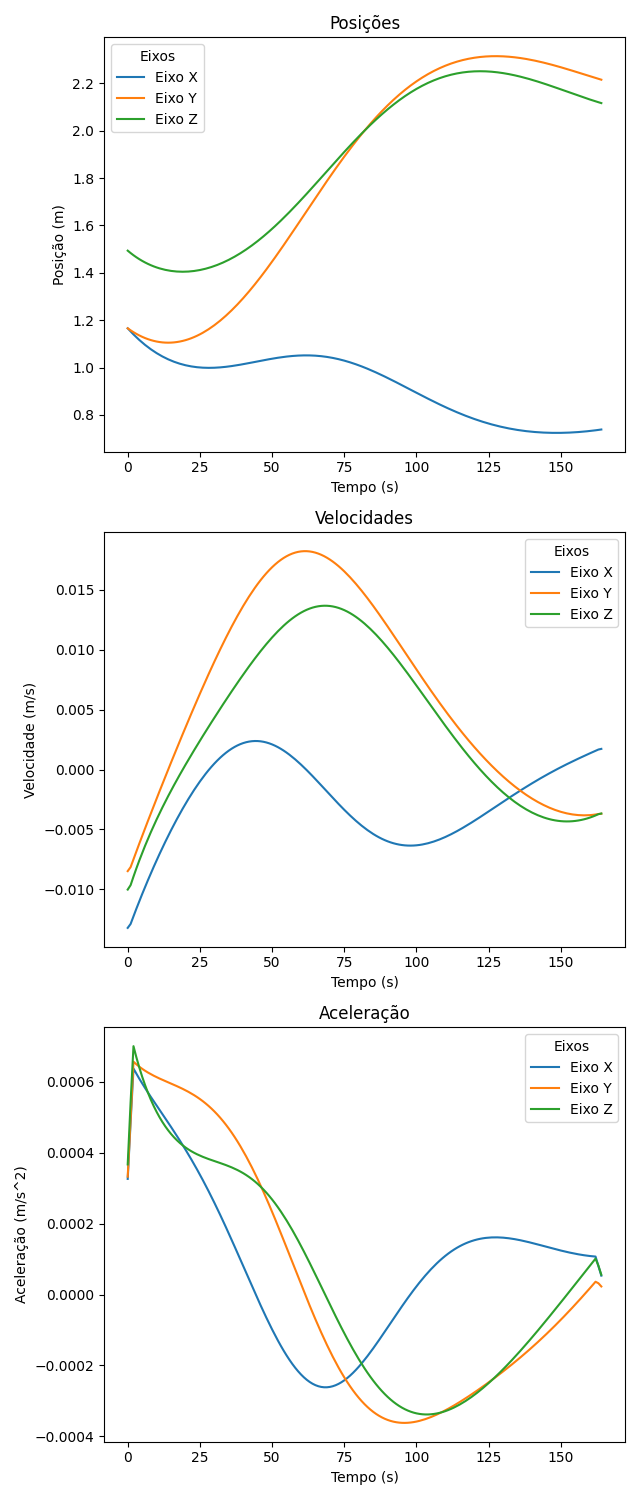

In [3]:
#Apresentação dos gráficos de posição, velocidade e aceleração
plt.ion()

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.0)
fig.set_figheight(15)

def display_resultados(title,arr):
    print(arr.shape)
    for i in range(3):    
        axs[i].set_title(title[i])
        grad=np.gradient(arr[:,i])

        axs[0].plot(arr[:,i], label=legends[i])
        axs[1].plot(grad, label=legends[i])  
        axs[2].plot(np.gradient(grad), label=legends[i])

        axs[0].legend(title='Eixos')
        axs[1].legend(title='Eixos')
        axs[2].legend(title='Eixos')
        axs[i].set(xlabel='Tempo (s)', ylabel=ylabel[i])
    plt.tight_layout()
    plt.show
     
titles = ['Posições','Velocidades', 'Aceleração']# Os titulos dos plots vistos abaixo 
legends = ['Eixo X','Eixo Y', 'Eixo Z'] #legenda de cada eixo apresentado nos gráficos
ylabel = ['Posição (m)','Velocidade (m/s)', 'Aceleração (m/s^2)'] #Legenda dos eixos X e Y dos gráficos

n=0
while n==0:
    #Introduzir gráfico pretendido, para ser mais fácil visualizar cada caso
    mimi= input("Insira 'Posf' para gráficos da posição final, 'Posm' para gráficos da posição média e 'tet' para gráficos dos thetas.")
    if mimi == 'Posf':
        display_resultados( titles , np.array(G.poscs))
        n=1
    elif mimi == 'Posm':
        display_resultados( titles ,  np.array(G.posms))
        n=1
    elif mimi == 'tet':
        display_resultados( titles ,  np.array(G.tets).T)
        n=1
    else :
        continue

In [ ]:
import pygame
from pygame.locals import*

from OpenGL.GL import*
from OpenGL.GLU import*


def show_surfaces(t):
    #eixos 1(base) 2(l2) e 3(l1)
    cil1 = np.vstack(list(map(np.ravel, G.surface_points[0][t]))).T 
    cil2 = np.vstack(list(map(np.ravel, G.surface_points[1][t]))).T
    cil3 = np.vstack(list(map(np.ravel, G.surface_points[2][t]))).T
    #juntas 1 e 2
    sph1 = np.vstack(list(map(np.ravel, G.surface_points[3][t]))).T
    sph2 = np.vstack(list(map(np.ravel, G.surface_points[4][t]))).T
    #cone 
    cone = np.vstack(list(map(np.ravel, G.surface_points[5][t]))).T
    shapes = [cil1, cil2, cil3, sph1, sph2, cone]
    #cores deles
    colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 0), (0, 0, 1)]

    glPointSize(10)#tamanho dos pontos que vao ser usados para representar as figuras
    glBegin(GL_POINTS)
    #atribuir as cores a cada objeto
    for c,shape in enumerate(shapes):
        for vertex in shape:
            glColor3d(*(colors[c]))
            glVertex3fv(vertex)
    glEnd()


def main():
    pygame.init()
    display = (800,600)# tamanho do display
    pygame.display.set_mode(display, DOUBLEBUF|OPENGL)

    gluPerspective(60, (display[0]/display[1]), 0.1, 50)#prespetiva da camera inicial

    glTranslatef(0.0, 0.0, -15)
    glRotatef(-30, 1, 0, 0)

    running = True
    t = 0
    #controlo da posição da camera 
    while running:
        #evento para fechar o programa 
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            # eventos para controlo da camera 
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    glRotatef(6, 0, 0, -10)
                if event.key == pygame.K_RIGHT:
                    glRotatef(6, 0, 0, 10)
                if event.key == pygame.K_UP:
                    glRotatef(6, -10, 10, 0)
                if event.key == pygame.K_DOWN:
                    glRotatef(6, 10, -10, 0)
        # zoom in e zoom out
        if event.type == pygame.MOUSEBUTTONDOWN and event.button == 1: 
            glScaled(1.05, 1.05, 1.05);
        elif event.type == pygame.MOUSEBUTTONDOWN and event.button == 3: 
            glScaled(0.95, 0.95, 0.95);


        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        # mostrar as superficies desenhadas 
        show_surfaces(t%G.nframes)
        # mandar a superficie para o ecrã
        pygame.display.flip()
        # tempo entre cada posição desenhada 
        pygame.time.wait(10)
        t+=1
        # no final da animação dá loop outra vez depois de 0.5 segundos
        if t%G.nframes==0:
            sleep(0.5)
    pygame.quit()


main()